# GB_filtered Visualization

## How are foreign countries referenced in parliamentary debates?
### 1. Frequency of Mentions: 
Show which foreign countries or regions are most frequently mentioned.
### 2. Distribution by Political Party: 
Illustrate how mentions of foreign countries vary across different political parties to identify potential partisan differences in focus.

## Preprocessing: 
Convert to Lowercase;
Handle Abbreviations and Synonyms;
Filter for Foreign Countries.

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

df = pl.read_csv("GB.csv")

# Preprocessing
df = df.with_columns(pl.col("entity").str.to_lowercase().alias("entity_normalized"))

entity_mapping = {
    "eu": "europe",
    "usa": "united states",
    "us": "united states",
    "uk": "united kingdom"
}

df = df.with_columns(
    pl.col("entity_normalized").replace(entity_mapping).alias("entity_normalized")
)

uk_terms = ["united kingdom", "england", "scotland", "wales", "northern ireland"]
df_foreign = df.filter(~pl.col("entity_normalized").is_in(uk_terms))


## Visualization 1 - Frequency of Mentions of Foreign Countries/Regions

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9656\3088712233.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_entities, x="count", y="entity_normalized", palette="Blues_d")


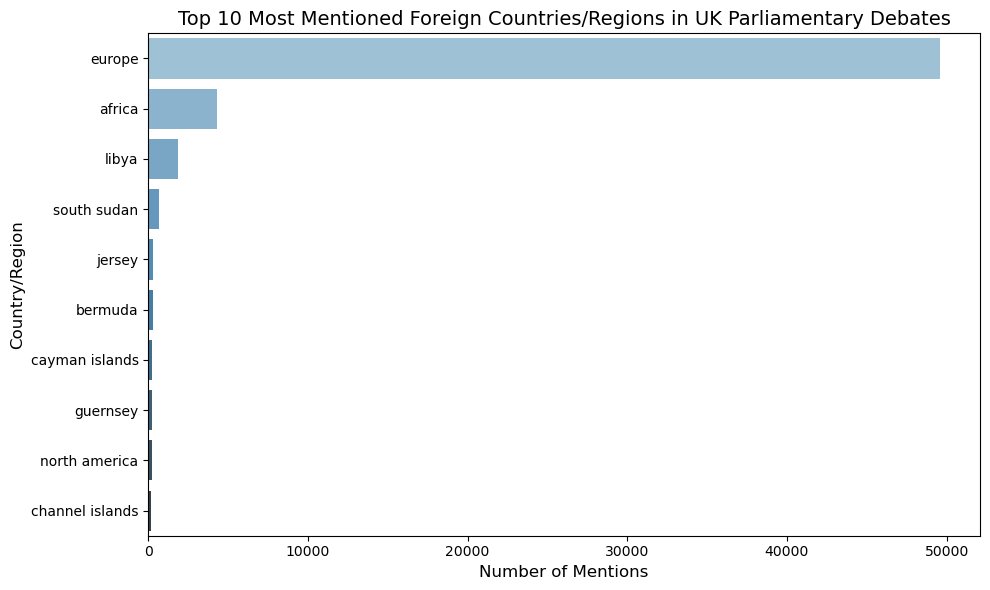

In [2]:
# Aggregate frequency of mentions
frequency_table = df_foreign.group_by("entity_normalized").agg(
    count=pl.col("entity_normalized").count()
).sort("count", descending=True)

# Convert to a format suitable for plotting (limit to top 10 for clarity)
top_entities = frequency_table.head(10).to_pandas()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_entities, x="count", y="entity_normalized", palette="Blues_d")
plt.title("Top 10 Most Mentioned Foreign Countries/Regions in UK Parliamentary Debates", fontsize=14)
plt.xlabel("Number of Mentions", fontsize=12)
plt.ylabel("Country/Region", fontsize=12)
plt.tight_layout()
plt.show()


## Visualization 2 - Distribution of Mentions by Political Party

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9656\2041089981.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

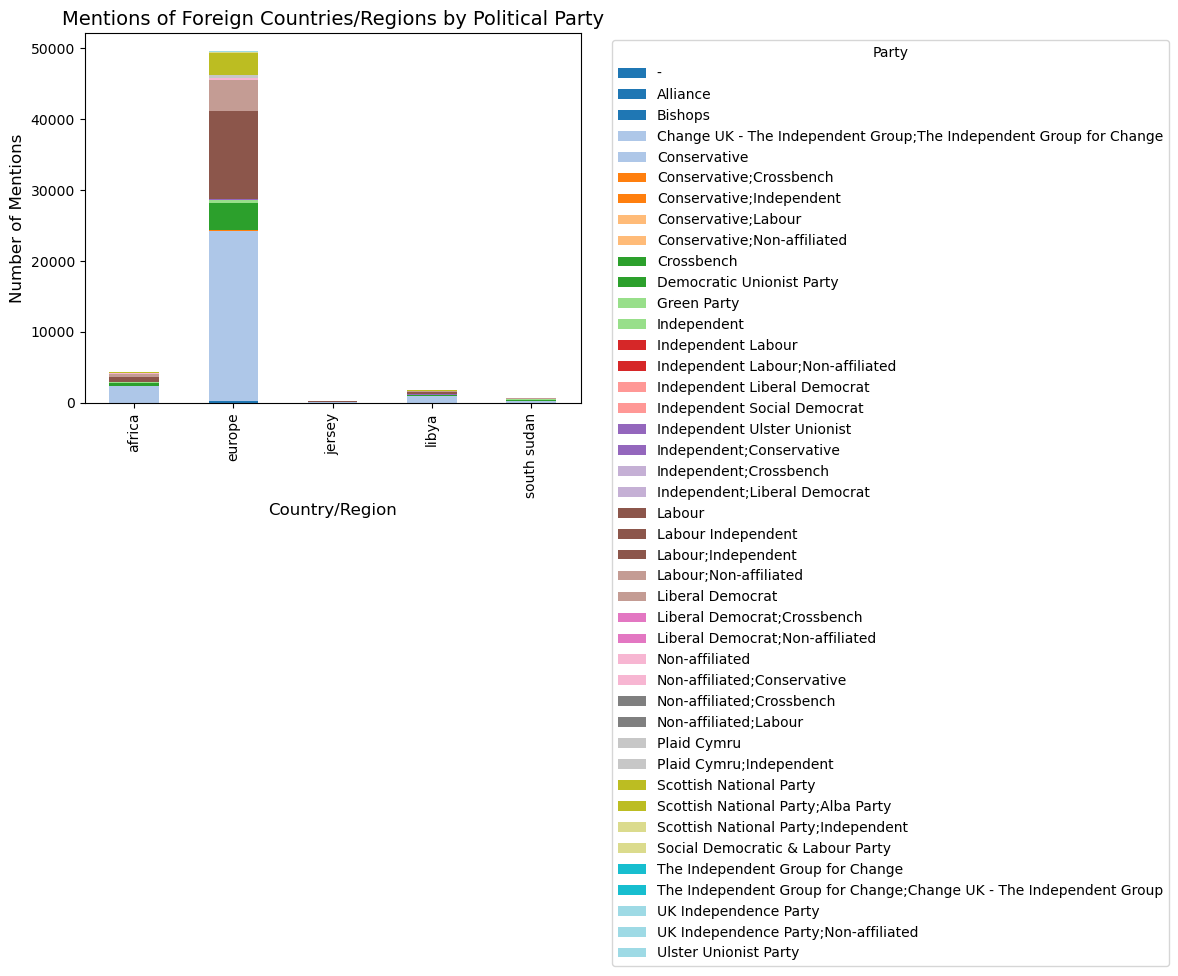

In [3]:
# Aggregate mentions by entity and party (focus on top 5 entities for clarity)
top_5_entities = frequency_table.head(5)["entity_normalized"].to_list()
df_filtered = df_foreign.filter(pl.col("entity_normalized").is_in(top_5_entities))

party_mentions = df_filtered.group_by(["entity_normalized", "Speaker_party_name"]).agg(
    count=pl.col("entity_normalized").count()
).sort(["entity_normalized", "count"], descending=[False, True]).to_pandas()

# Pivot the data for plotting
pivot_table = party_mentions.pivot(index="entity_normalized", columns="Speaker_party_name", values="count").fillna(0)

# Create stacked bar plot
plt.figure(figsize=(12, 8))
pivot_table.plot(kind="bar", stacked=True, cmap="tab20")
plt.title("Mentions of Foreign Countries/Regions by Political Party", fontsize=14)
plt.xlabel("Country/Region", fontsize=12)
plt.ylabel("Number of Mentions", fontsize=12)
plt.legend(title="Party", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## How do speaker-level variables (age, ideology, gender, ...) correlate with cross-national references?



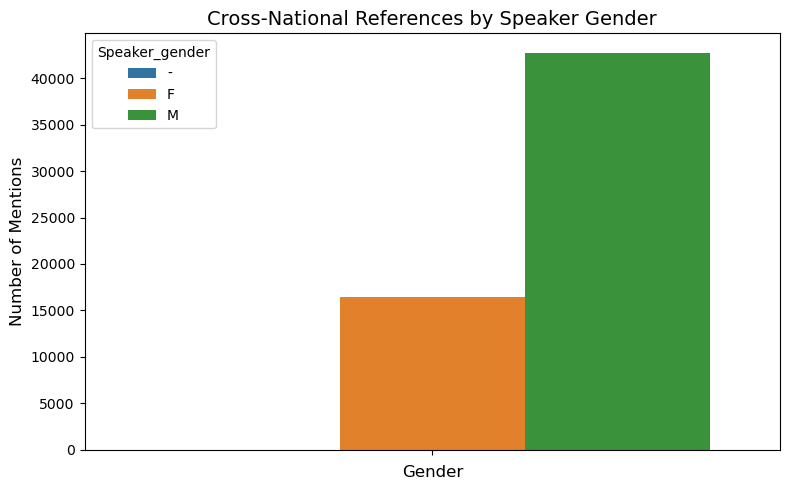

In [4]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Count mentions by gender
gender_mentions = df_foreign.group_by("Speaker_gender").agg(
    count=pl.col("entity_normalized").count()
).to_pandas()

# Visualize mentions by gender
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_mentions, hue="Speaker_gender", y="count", legend=True)
plt.title("Cross-National References by Speaker Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Mentions", fontsize=12)
plt.tight_layout()
plt.show()



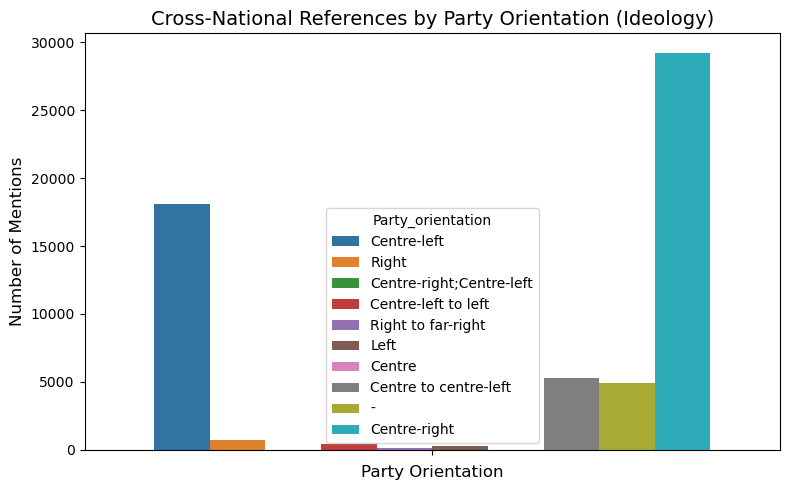

In [5]:
# Count mentions by party orientation
orientation_mentions = df_foreign.group_by("Party_orientation").agg(
    count=pl.col("entity_normalized").count()
).to_pandas()

# Visualize mentions by party orientation
plt.figure(figsize=(8, 5))
sns.barplot(data=orientation_mentions, hue="Party_orientation", y="count", legend=True)
plt.title("Cross-National References by Party Orientation (Ideology)", fontsize=14)
plt.xlabel("Party Orientation", fontsize=12)
plt.ylabel("Number of Mentions", fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9656\5004554.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=party_mentions, x="count", y="Speaker_party_name", palette="Oranges_d")


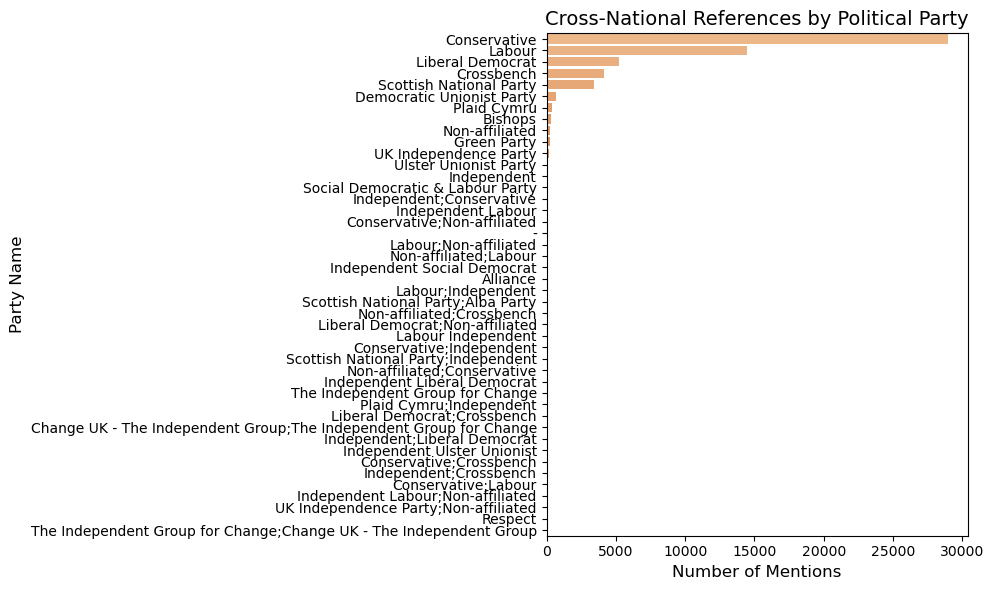

In [6]:
# Count mentions by party name
party_mentions = df_foreign.group_by("Speaker_party_name").agg(
    count=pl.col("entity_normalized").count()
).sort("count", descending=True).to_pandas()

# Visualize mentions by party name
plt.figure(figsize=(10, 6))
sns.barplot(data=party_mentions, x="count", y="Speaker_party_name", palette="Oranges_d")
plt.title("Cross-National References by Political Party", fontsize=14)
plt.xlabel("Number of Mentions", fontsize=12)
plt.ylabel("Party Name", fontsize=12)
plt.tight_layout()
plt.show()


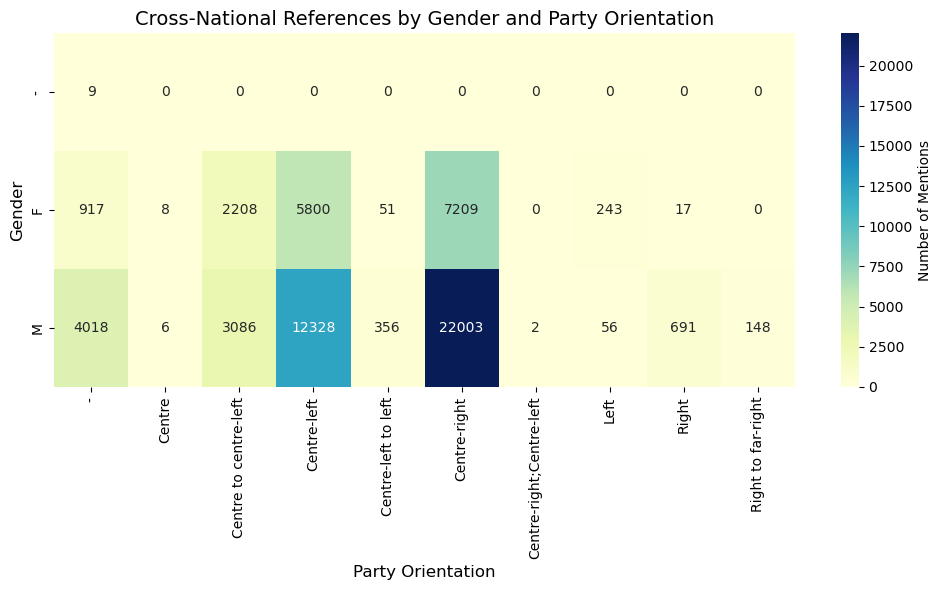

In [7]:
# Aggregate mentions by gender and party orientation
combined_mentions = df_foreign.group_by(["Speaker_gender", "Party_orientation"]).agg(
    count=pl.col("entity_normalized").count()
).to_pandas()

# Pivot for heatmap
pivot_combined = combined_mentions.pivot(index="Speaker_gender", columns="Party_orientation", values="count").fillna(0)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_combined, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Number of Mentions'})
plt.title("Cross-National References by Gender and Party Orientation", fontsize=14)
plt.xlabel("Party Orientation", fontsize=12)
plt.ylabel("Gender", fontsize=12)
plt.tight_layout()
plt.show()
